## Twitter post analytics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Data

The data is generated randomly. It consists of 3 columns: Date, Category, and Number of Likes.
The categories are Food, Travel, Fashion, Fitness, Music, Culture, Family, and Health.

In [2]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']
data = pd.DataFrame(columns = ['Date', 'Category', 'Likes'])
random.seed(10)
np.random.seed(10)
data['Date'] = pd.date_range('2021-01-01', periods=500)
data['Category'] = [random.choice(categories) for _ in range(500)]
data['Likes'] = np.random.randint(0, 10000, size = 500)
data

,Date,Category,Likes
0,2021-01-01,Food,1289
1,2021-01-02,Family,7293
2,2021-01-03,Health,1344
3,2021-01-04,Food,7291
4,2021-01-05,Fitness,9372
...,...,...,...
495,2022-05-11,Culture,9244
496,2022-05-12,Food,6455
497,2022-05-13,Culture,5510
498,2022-05-14,Music,8464


## Data cleaning
The process of cleaning this data is:
   - deleting null values
   - fixing incorrectly formatted values
   - deleting outliers
   
   
   
   Because this data is generated randomly with pre-defined values, there are no null or incorrectly formatted values

In [3]:
data.isnull().sum()

Date        0
Category    0
Likes       0
dtype: int64

<Axes: >

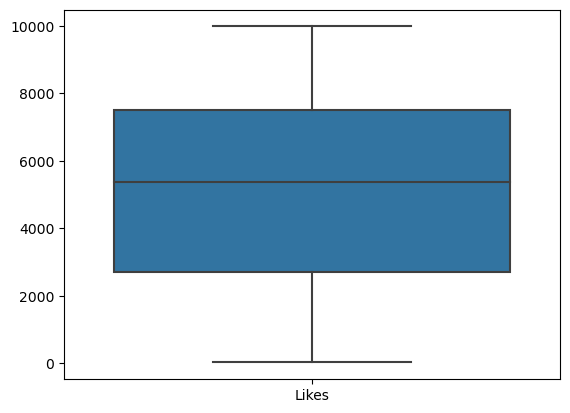

In [4]:
sns.boxplot(data)

## Goals


We are going to see:
- in which category are people most and least interested in, 
- when and about what to post to get the most likes
- when and about what not to post

## Category analysis



Health posts tend to have less than 6000 likes (max is 9977) and are the 3rd most frequent kind of post but have the second lowest average like count. They are popular for posting but not popular for followers to engage with, which is why I don't recommend posting about health.

Music is the least popular category. It has the least posts and the lowest average. People aren't interested in Music posts. Consequently, Music posts may not be the most effective way to reach a large audience.

There aren't many Fitness posts, but this category has the third biggest average likes count per post, and most of the posts in this category have 7000-10,000 likes. This category has a promising like count, and not a lot of people are using it so it doesn't have a lot of competition.

Another category to post about is 'Family'. Even though this category has the most posts, people aren't tired of reading 'Family' posts. They are the most popular, they have the biggest average like count and more than half of the 'Family' posts have between 6000 and 10000 likes. The most liked post is in this category. 


In [5]:
data['Category'].value_counts(sort = True)

Fashion    75
Family     73
Health     72
Food       65
Culture    63
Travel     55
Fitness    52
Music      45
Name: Category, dtype: int64

<Axes: xlabel='Category'>

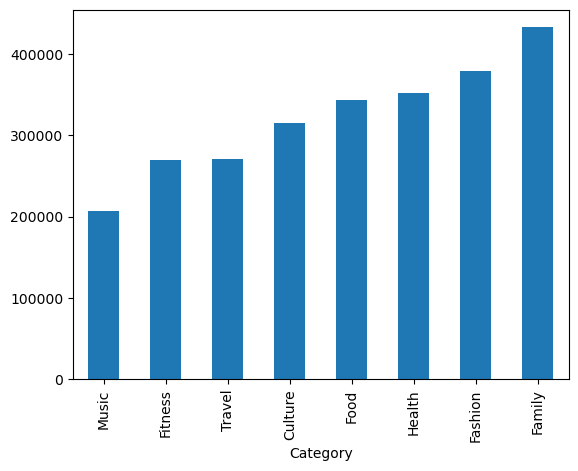

In [6]:
data_by_category = data.groupby('Category')
sum_likes_by_category = data_by_category['Likes'].sum().sort_values()
sum_likes_by_category.plot(kind = 'bar')

<Axes: xlabel='Category'>

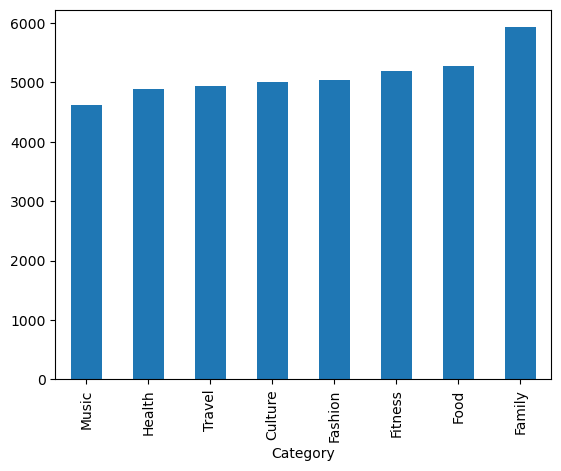

In [7]:
mean_likes_by_category = data_by_category['Likes'].mean().sort_values()
mean_likes_by_category.plot(x = 'Category', y = 'Average Likes', kind = 'bar')

In [8]:
data.sort_values(by = 'Likes', ascending = False).head(3)

,Date,Category,Likes
372,2022-01-08,Family,9977
99,2021-04-10,Health,9972
120,2021-05-01,Culture,9957


In [9]:
data.sort_values(by = 'Likes').head(3)

,Date,Category,Likes
336,2021-12-03,Culture,26
48,2021-02-18,Family,44
276,2021-10-04,Fitness,58


In [10]:
data_by_category.agg({'Likes': ['max','min', 'mean'] })

Likes                  
           max  min         mean
Category                        
Culture   9957   26  5002.888889
Family    9977   44  5928.383562
Fashion   9943  208  5047.360000
Fitness   9581   58  5190.211538
Food      9769   59  5277.153846
Health    9972  232  4896.236111
Music     9616  227  4612.155556
Travel    9879  144  4933.672727

<Axes: xlabel='Likes', ylabel='Count'>

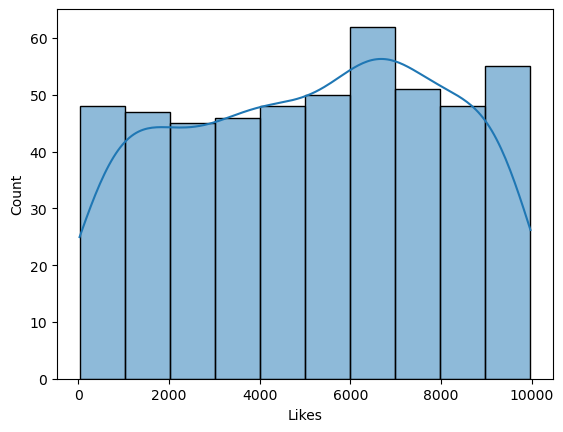

In [11]:
#likes for all posts
sns.histplot(data = data, x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

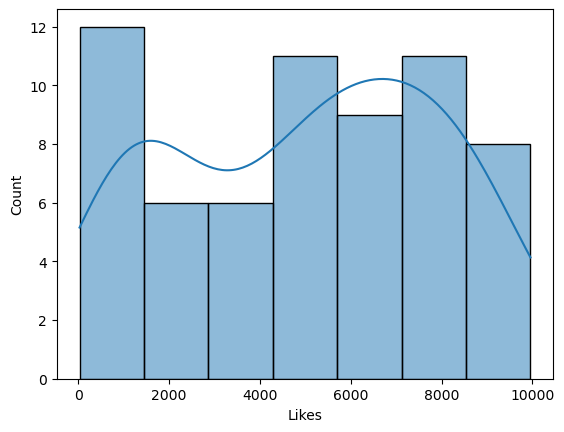

In [12]:
#likes for Culture posts
sns.histplot(data = data[data['Category'] == 'Culture'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

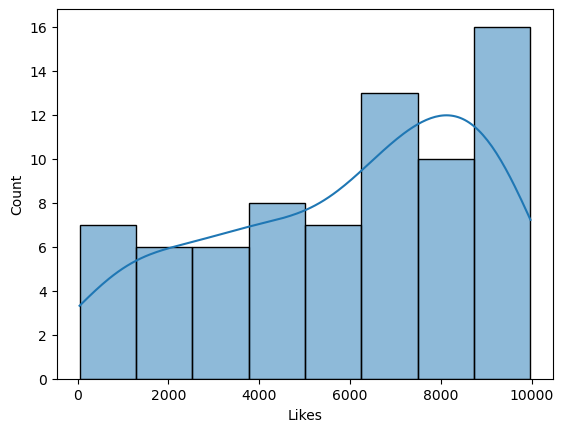

In [13]:
#likes for Family posts
sns.histplot(data = data[data['Category'] == 'Family'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

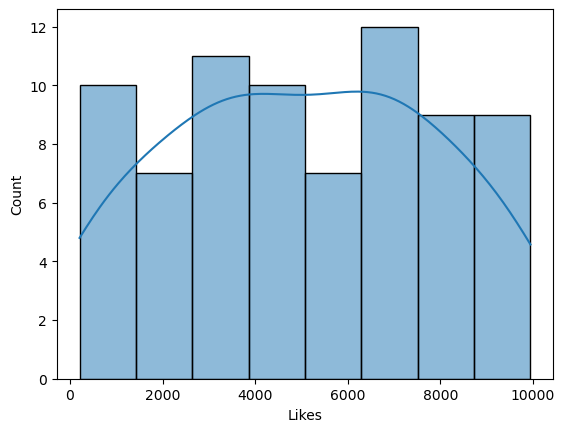

In [14]:
#likes for Fashion posts
sns.histplot(data = data[data['Category'] == 'Fashion'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

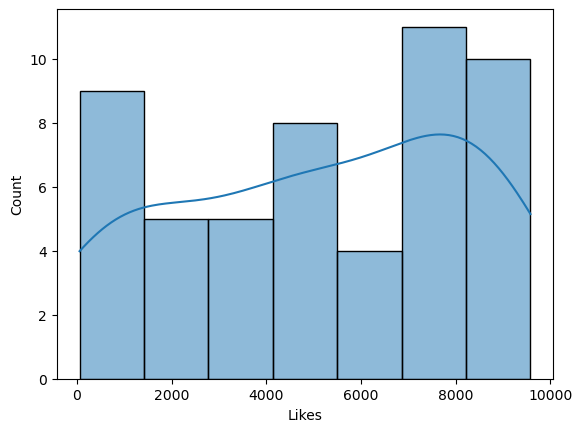

In [15]:
#likes for Fitness posts
sns.histplot(data = data[data['Category'] == 'Fitness'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

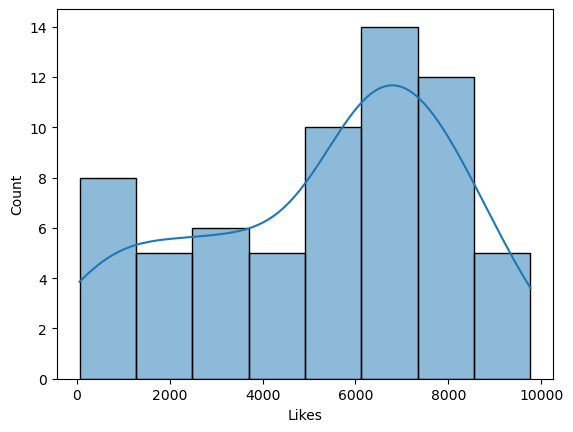

In [16]:
#likes for Food posts
sns.histplot(data = data[data['Category'] == 'Food'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

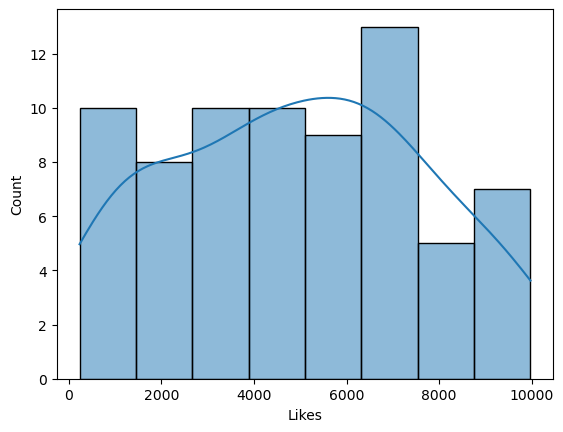

In [17]:
#likes for Health posts
sns.histplot(data = data[data['Category'] == 'Health'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

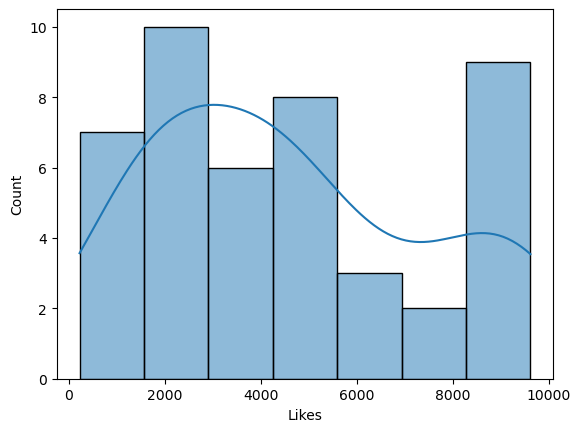

In [18]:
#likes for Music posts
sns.histplot(data = data[data['Category'] == 'Music'], x = 'Likes', kde=True)

<Axes: xlabel='Likes', ylabel='Count'>

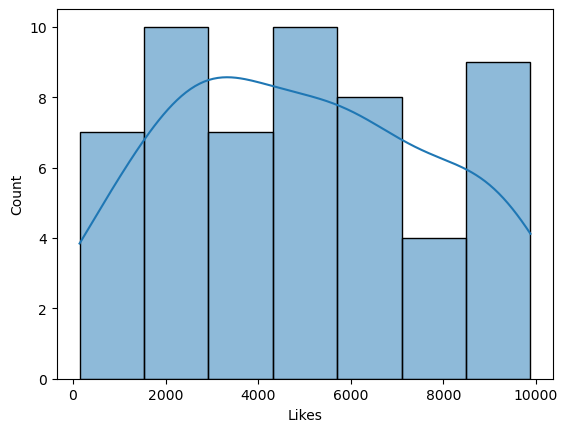

In [19]:
#likes for Travel posts
sns.histplot(data = data[data['Category'] == 'Travel'], x = 'Likes', kde=True)

## Date analysis

Throughout the years, the monthly likes have not been consistent and a good prediction model has not been developed. According to this data, August, December, and July are the best times to post, as they have the highest average number of likes.

In [20]:
#data['Date'] = pd.to_datetime(data['Date'])
#data.groupby(data['Date'].dt.strftime('%B'))['Likes'].mean().sort_values(ascending = False)

In [21]:
#data.groupby(data['Date'].dt.strftime('%B'))['Date'].count().sort_values(ascending = False)

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data1 = data.set_index('Date')
GB = data1.groupby([(data1.index.year), (data1.index.month)])['Likes'].sum().sort_values(ascending = False)
GB

Date  Date
2021  8       177039
      12      174722
      7       173644
2022  3       173468
2021  9       166087
2022  4       164546
2021  4       154640
2022  1       153397
2021  11      152022
      5       150025
      6       146174
      10      144573
      3       143361
2022  2       143334
2021  1       136463
      2       129749
2022  5        87596
Name: Likes, dtype: int32